# PS 2
Due: 10/10/2024, 11:59 pm

Name: Susan Wang


**Note: Mathematica or SymPy are allowed (and encouraged) for the analytical problems, but please include your code (as a text box if using Mathematica)**

---
## Problem 1: Bistable switch, neural integrator (40 points)

Consider the case of a single neuron with an autapse,
with the rate-based equation for its synaptic dynamics $s(t)$ given by

$$\tau \frac{d s}{dt} = -s + f(ws+b),$$

where $\tau$ is the synaptic time constant (units ms), and the transfer function $f(g)$ is a sigmoid given by

$$f(g) = \frac{1}{1+e^{-g}},$$

$w$ is the scalar strength
of the autapse (unitless, since s is dimensionless), and $b$ is the scalar sum of all external inputs to the cell (also dimensionless). For a given model, $\tau$, $w$ and $b$ are fixed parameters. In the following questions we will explore how the dynamics of the model change when we vary these parameters.

Note: changing $\tau$ does not affect the existence or stability of any fixed points, so we can safely ignore it in all the following analyses.


### 1.1 [6 points] Sigmoid function analysis

#### a.)

Plot the curves $y=s$ and $y=f(s)$ as a function of $s$ for various values of the parameters $w$ and $b$.

First vary $w$ between 0 and 10 with $b$ simultaneously varying as $b = -w/2$. From the plot, identify

1.   the range of the function $f(s)$, and
2.   the (x,y) coordinates where $y=f(s)$ crosses the line ($y=s$)

What is the effect of changing $w$? does this make sense with your intuitive understanding of $w$ as the weight of the autapse?


1. The range of $f(s)$ is 0 to 1.
2. $y = f(s)$  intersects $y =s$ when there's a fixed points. The fixed points for varying w are:
*   w = 0: (0.5, 0.5)
*   w = 2: (0.5, 0.5)
*   w = 4: (0.5, 0.5)
*   w = 6: (0.1, 0.08317), (0.5, 0.5), (0.9, 0.9168)
*   w = 8: (1.776e-15, 0.01798), (0.5, 0.5), (1.00, 0.9820)
*   w = 10: (1.776e-15, 0.006693), (0.5, 0.5), (1.0, 0.9933)

Effect of changing $w$: When $w$ is low, the neuron has minimal self-feedback, resulting in a single fixed point around 0.5. As
$w$ increases, the self-feedback strengthens, and the system may exhibit different behaviors, including shifts in fixed points. A higher $w$ can lead to multiple fixed points, suggesting potential bistability, aligning with the idea that a stronger autapse creates more complex dynamics.

Text(0, 0.5, 'y')

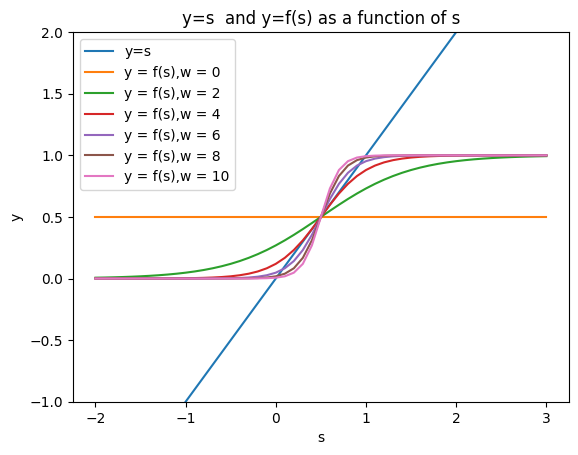

In [97]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(s,w,b):
  return 1/(1+ np.exp(-w*s-b))

# plots for different w

w = np.arange(0,11,2)
s= np.arange(-2,3.1,.1)
plt.plot(s,s,label = 'y=s')
intersect = []
for ww in w:
  fs = sigmoid(s,ww,-ww/2)
  for i,y in enumerate(fs):
    if np.abs(y - s[i]) < 0.02:
      intersect.append([s[i],y,ww])
  plt.plot(s,fs,label= f"y = f(s),w = {ww}")


plt.legend()
plt.ylim(-1,2)
plt.title("y=s  and y=f(s) as a function of s")
plt.xlabel("s")
plt.ylabel("y")

#### b.)


Next plot (in a separate figure) varying only $b$ between -2 and 2 with fixed $w=4$. Does this make sense with your intuitive understanding of b as including the feedforward input?

Yes, this make sense with my intuitive understanding of $b$. $b$ is the bias of the autapse, which corresponds to strength of the feedforward inputs. A negative $b$ will inhibits the neuron (thus reducing f(s) when holding $s$ constant), and a positive $b$ will activate the neuron (thus increasing $f(s)$ when holding $s$ constant).

Text(0, 0.5, 'y')

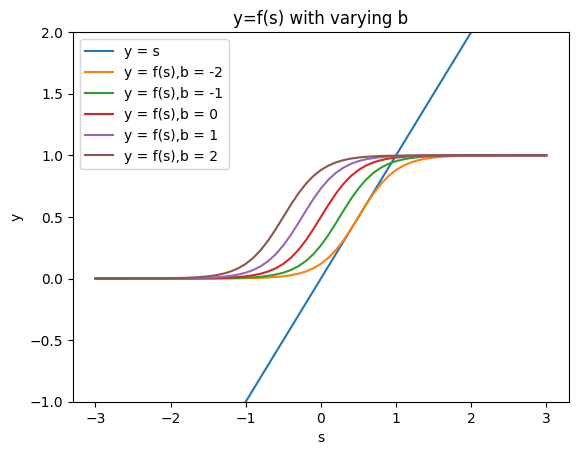

In [98]:
# vary b

w = 4

s= np.arange(-3,3.1,.1)

b = np.arange(-2,3,1)
plt.plot(s,s,label = "y = s")

for bb in b:
  plt.plot(s,sigmoid(s,w,bb),label= f"y = f(s),b = {bb}")

plt.legend()
plt.ylim(-1,2)
plt.title("y=f(s) with varying b")
plt.xlabel("s")
plt.ylabel("y")

### 1.2 [6 points]

#### a.)

Assuming $b = −w/2$, analytically derive the threshold value $w^*$ above which
the system exhibits bistability and below which it does not.
Explain which fixed points are stable and why.

[Hint: the sigmoid $f(x)$ and the line $x$ intersect at three points only when the sigmoid is steeper than the line at $x = 1/2$. The critical point will occur when the curves have the same slope.]

$$f(s) =\frac{1}{1+e^{-(ws +b)}}$$
$$\frac{d f(s)}{d s} = f(s)(1-f(s))\cdot w$$
Plugging in $s = \frac{1}{2}$ and $b = -\frac{w}{2}$, we have that
$$\frac{d f(s)}{d s}= \frac{1}{1+e^{0}}(1-\frac{1}{1+e^{0}})\cdot w$$
We want $\frac{d f(s)}{d s} > 1 $
$$\implies \frac{1}{4}\cdot w > 1$$

$$w  > 4.$$

So $w^* = 4.$ Above this threshold, we get three fixed points. Label them $s^*_1,\;s^*_2,\;s^*_3$ correspondingly. The fixed point at $s^*_2 = \frac{1}{2}$ is unstable, and the other two are stable.

$s^*_2$ is unstable because $f(s) < s \implies \frac{ds}{dt} < 0$ when $s^*_1 < s < s^*_2$ and $f(s) > s \implies \frac{ds}{dt}>0$ when $s^*_2 < s < s^*_3$.

$s^*_1$ and $s^*_3$ are stable because $f(s) > s \implies \frac{ds}{dt} > 0$ when $s < s^*_1$ and $s^*_2 < s < s^*_3$; and $f(s) < s \implies \frac{ds}{dt} < 0$ when $s^*_1 < s < s^*_2$ and $s^*_3 < s$.

Below the threshold, we get only one fixed point $s^*$, which is stable because $f(s) > s$ for $s < s^*$ and $f(s) < s$ for $s > s^*$.

#### b.)

Plot both $y=s$ and $y=f(s)$ for $w=6,4,2$.


Text(0, 0.5, 'y')

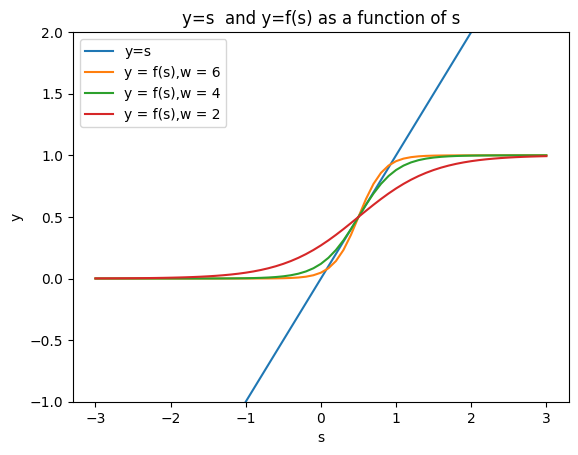

In [99]:
plt.plot(s,s,label = 'y=s')
for w in [6,4,2]:
  plt.plot(s,sigmoid(s,w,-w/2),label= f"y = f(s),w = {w}")
  plt.legend()

plt.title("y=s  and y=f(s) as a function of s")
plt.ylim(-1,2)
plt.xlabel("s")
plt.ylabel("y")

### 1.3 [6 points] Bifurcation

#### a.)

For two cases: $w=2< w^*$ and $w=6>w^*$, use graphical stability analysis to reason about the stability of the fixed points evident in your plot from 1.1. (Explain in words how you determined which fixed points are stable or unstable).

Produce a new plot for each case plotting $𝑦=𝑠$ and $𝑦=𝑓(𝑠)$ as in 1.1. Add a green marker for the stable fixed points, and a red marker for the unstable ones. There is no need to analytically solve for the coordinates of the fixed point(s), just visually estimate to get the markers in the right place.

I determined the stability of the fixed points by grphical analysis. When $f(s) < s$ for $s < s^*$ and $f(s) > s$ for $s > s^*$, it's an unstable fixed point. When $f(s) > s$ for $s < s^*$ and $f(s) < s$ for $s > s^*$, it's a stable fixed point.

Text(0, 0.5, 'y')

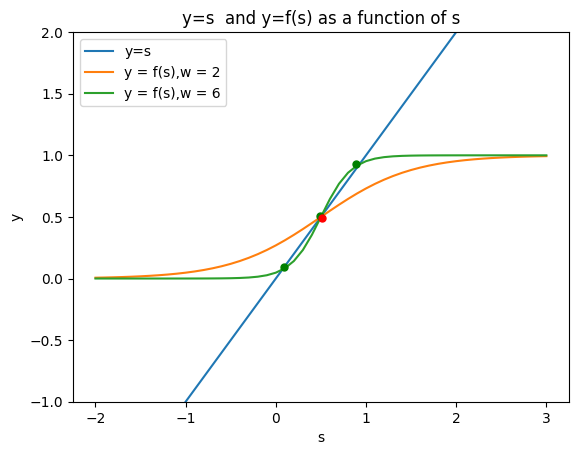

In [100]:
from re import U
w = [2,6]
s= np.arange(-2,3.1,.1)
plt.plot(s,s,label = 'y=s')
intersect = []
for ww in w:
  fs = sigmoid(s,ww,-ww/2)
  for i,y in enumerate(fs):
    if np.abs(y - s[i]) < 0.02:
      intersect.append([s[i],y,ww])
  plt.plot(s,fs,label= f"y = f(s),w = {ww}")

stable = [(0.5000000000000022, 0.5000000000000011),(0.9000000000000026, 0.9168273035060788),(0.10000000000000187, 0.08317269649392323),]
unstable = [(0.5000000000000022, 0.5000000000000033)]

for x,y in stable:
  plt.plot(x-0.01, y+0.01, color='green',marker='.',markersize=10.0)


for x,y in unstable:
  plt.plot(x+0.01, y-0.01, color='red',marker='.',markersize=10.0)


plt.legend()
plt.ylim(-1,2)
plt.title("y=s  and y=f(s) as a function of s")
plt.xlabel("s")
plt.ylabel("y")

#### b.)

Edit the legend for the plot below (replace the question marks) to correctly indicate which fixed points are stable and which are unstable.

This plot illustrates why the dynamical system is said to undergo a “pitchfork bifurcation” at $w^∗$.

In [101]:
import numpy as np
import matplotlib.pyplot as plt

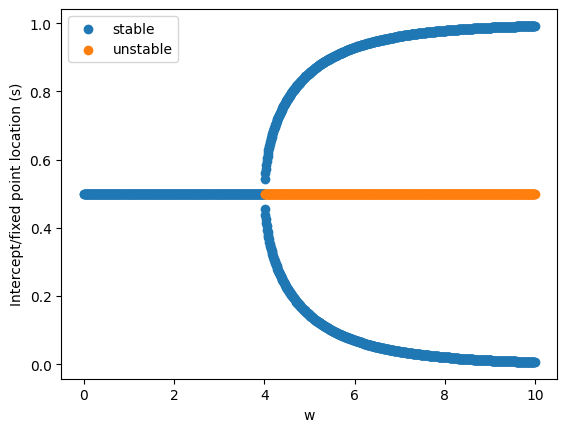

In [102]:
def f(I):
  return np.exp(I)/(1+np.exp(I))

ws = np.arange(0, 10, .01)
S = np.arange(0, 1, .001)
bin2s = []
bin2_ws = []
bin1_s = []
bin1_ws = []
for w in ws:
    b_0 = -w/2
    label_text = 'b = '+str(b_0)
    I = w*S + b_0
    F = f(I)

    diff = S-F
    signs = np.sign(diff)
    signs[signs==0]=1
    zero_crossings = np.where(np.diff(signs))[0] #from https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python
    intercepts = S[zero_crossings]
    # ^^^ if the fixed points were analytically solvable we could just use that solution,
    # since they are not we have to approximate
    # this should still indicate how the bifurcation diagram can be found using primarily analytical methods
    # and you will see later that your numeric simulations agree
    for i, intercept in enumerate(intercepts):
        if i%2 == 0:
            bin2s.append(intercept)
            bin2_ws.append(w)
        else:
            bin1_s.append(intercept)
            bin1_ws.append(w)

plt.scatter(bin2_ws, bin2s, label='stable') # TODO
plt.scatter(bin1_ws, bin1_s, label='unstable') # TODO

plt.xlabel('w')
plt.ylabel('Intercept/fixed point location (s)')
plt.legend()


### 1.4 [6 points] Numerical Simulation
#### a.)

Numerically simulate the dynamics of the autapse, and use this simulation to verify your analytical results on the value of $w^∗$. Specifically, sweep $w$ across an interval containing $w^*$, and in a single figure, plot $s$ as a function of $t$ for each $w$ with at least four properly chosen initial points $s_0$. Color trajectories with $w<=4$ green and trajectories with $w>4$ red.

Are there any initial conditions that do not arrive at a fixed point and grow without bound? Are there any trajectories that remain at an unstable fixed point?

Hint: you can use odeint() from scipy.integrate. You may prefer this to looping through all the timesteps yourself.


No, no initial conditions grow without bound. All tranjectories starting at $s_0 = 0.5$ remain at the unstable fixed point regardless of their $w.$

Text(0, 0.5, 's')

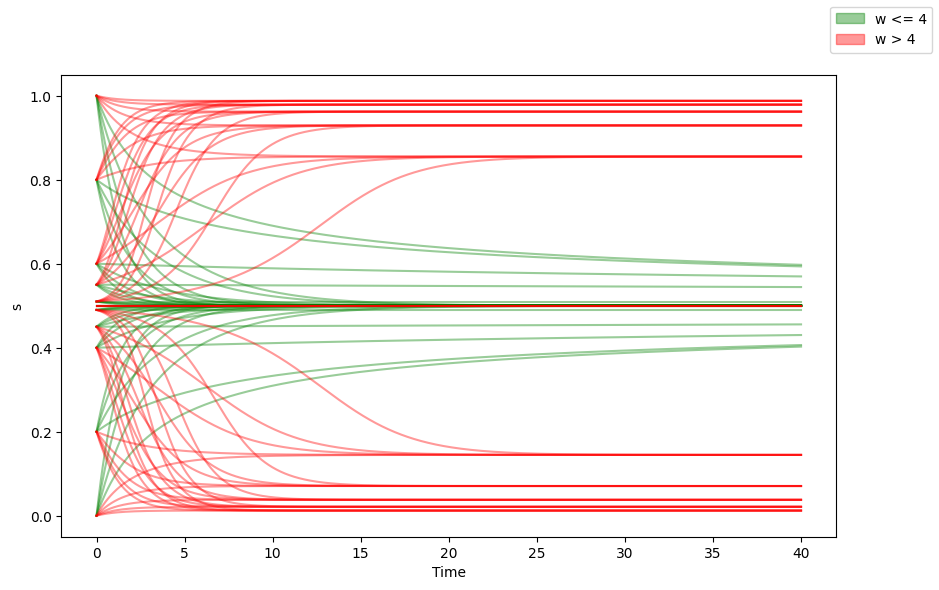

In [103]:
from scipy.integrate import odeint
import matplotlib.patches as mpatches
time = np.linspace(0,40,num=1000)
W = range(1,10)
S0 =[0, 0.2, 0.4, 0.45, 0.49, 0.5, 0.51, 0.55, 0.6, 0.8, 1]

Color =['red','green']

def dsdt(s, t, w, b):
    return -s + sigmoid(s, w, b)


fig, ax = plt.subplots(figsize=(10, 6))

stables = []
unstables = []
stables_w = []
unstables_w = []
for w in W:
    for s0 in S0:
        sout = odeint(dsdt, s0, time, args=(w, -w/2))[:, 0]
        ax.plot(time, sout, ls='-', color=Color[int(w <= 4)], label='_', alpha=0.4)
        if w <= 4 or np.abs(sout[-1]-0.5)>0.1:
            if w == 4 and s0 != 0.5:
              continue
            stables.append(sout[-1])
            stables_w.append(w)
        else:
            unstables.append(sout[-1])
            unstables_w.append(w)

### your code here

red_patch = mpatches.Patch(color='green', label='w <= 4', alpha = 0.4)
green_patch = mpatches.Patch(color='red', label='w > 4', alpha = 0.4)
fig.legend(handles=[red_patch, green_patch])
ax.set_xlabel('Time')
ax.set_ylabel('s')

#### b.)

From the above numerical simulation, plot the bifurcation diagram, i.e., s versus w. (You are recreating the pitchfork plot in 1.3 but with your numerical results.)

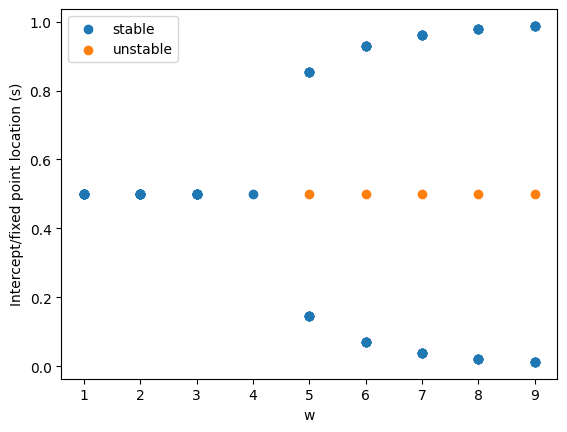

In [104]:
plt.scatter(stables_w, stables, label='stable') # TODO
plt.scatter(unstables_w, unstables, label='unstable') # TODO

plt.xlabel('w')
plt.ylabel('Intercept/fixed point location (s)')
plt.legend()


### 1.5 [ 6 points] Hysteresis: Numerical analysis

If the bistable switch is initialized at one of its stable fixed points, it takes a fairly strong drive to push it out of its basin of attraction into that of the other stable state. In fact, the state of the system as a function of the input b depends both on the instantaneous value of b and on the history of the system, i.e.,  which state it was initialized in. This phenomenon is called **hysteresis**.


#### a.)  

Try this in your simulation from 1.4: initialize the system in the lower steady state (aka the stable point or fixed point), and simulate the system to find the steady state for each value of b.

You may use $w=6$. Simulate over values of $b$ in $(-w,0)$. That is, increase $b$ in steps until it becomes zero. Then plot the $b$ versus the steady state value.



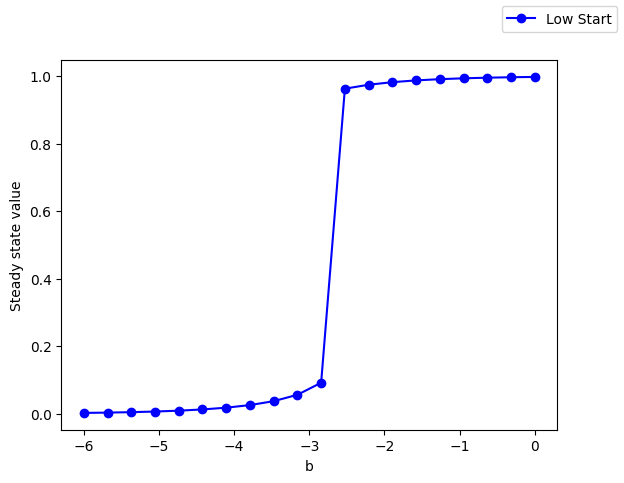

In [105]:
w = 6
b = np.linspace(-w, 0, 20)
s0 = 0

fig, ax = plt.subplots()
ss_vals1 = []
for bb in b:
  sout = odeint(dsdt, s0, time, args=(w, bb))[:, 0]
  ss_vals1.append(sout[-1])
ax.plot(b, ss_vals1,'bo-',label = "Low Start")
ax.set_xlabel('b')
ax.set_ylabel('Steady state value')
fig.legend()

#### b.)

Redo the calculation, but now initialize the system at the upper steady state with
$b = 0$. Add the resulting plot to the figure in a.




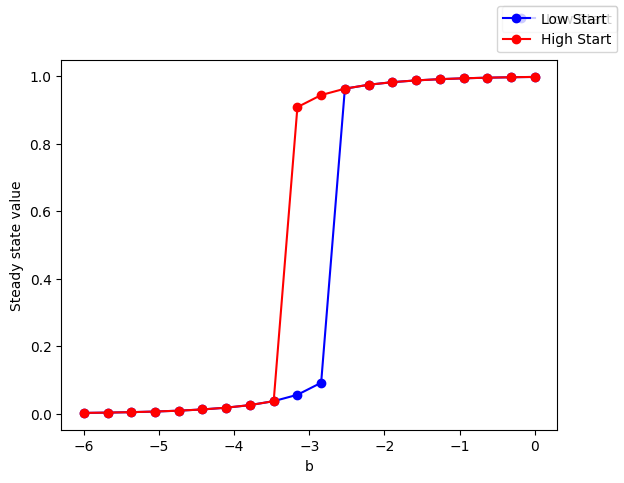

In [106]:
w = 6
b = np.linspace(0, -w, 20)
s0 = 1
ss_vals2 = []
for bb in b:
  sout = odeint(dsdt, s0, time, args=(w, bb))[:, 0]
  ss_vals2.append(sout[-1])
ax.plot(b, ss_vals2,'ro-',label = "High Start")
fig.legend()
fig

#### c.)

You should see that the upper steady state remains
stable down to a lower value of b when starting in the upper state, relative to
the substantially larger value of b required to move the lower steady state to the
upper one.

Give your interpretation of what is happening given that the parameter $b$ was varied from $-w$ to zero  and back to $-w$.

A point initialized at one state has memory of its initialization and tends to stay in that state because it needs a significant amount of change in $b$ to move pass the unstable fixed point at $s = 0.5$. The fixed point tends to go back to the basin of attraction it is initialized in when $b$ gets close to the critical $b^*$.

### 1.6 [ 5 points] Hysteresis (derivation)


Assume some fixed value of $w > w∗$, $b = b_0 = -w/2$, and an initialization in the lower steady state $s_1$. Calculate **approximately** what
increment $\delta b$ must be added to $b_0$ to drive the switch from the lower steady state $s_1$ to the upper one $s_2$. Note that a switch will happen when the lower steady state is
no longer a stable fixed point of the system. Calculate the jump in $s$ at this point.


Verify numerically that your derived answer is approximately correct.

[Hint: think about what changing b does to your curve--when does the number of intersections between the identity line and sigmoid curve change? How can you solve for that value]

[Hint: by approximately, we are looking for an numerical value. You might want to set up the problem analytically and solve it using SymPy. This will be a function of w, so you can plug in a value of $w$ that is above the bifurcation threshold (maybe $w=6$) and print out the change between $b_0$ and your new $b$]


In [107]:
import sympy as sp
import numpy as np
w_value = 6
b0_value = -w_value/2
s_guess = 0

def find_fixed_point(b, w, s_guess):
    s = sp.symbols('s')
    sigmoid = 1 / (1 + sp.exp(-w * s - b))
    equation = -s + sigmoid
    try:
        numerical_root = sp.nsolve(equation, s, s_guess)
        return float(numerical_root)
    except (sp.SympifyError, ValueError):
        return 0


b_values = np.linspace(-3,0,500)
s_values = np.asarray([find_fixed_point(b, w_value, s_guess) for b in b_values])

# Find where the derivative becomes positive/switched to the upper system
unstable_index = np.where(s_values > 0.5)[0][0]

b_bifurcation = b_values[unstable_index]
s_at_bifurcation = s_values[unstable_index]

delta_b = b_bifurcation - b0_value

print(f"When initialized at the lower basin, we pushed the fixed point to the higher basin after changing b by {delta_b:.2f}. The jump in s {s_at_bifurcation:.4f}")

When initialized at the lower basin, we pushed the fixed point to the higher basin after changing b by 0.44. The jump in s 0.9610


Text(0, 0.5, 'y')

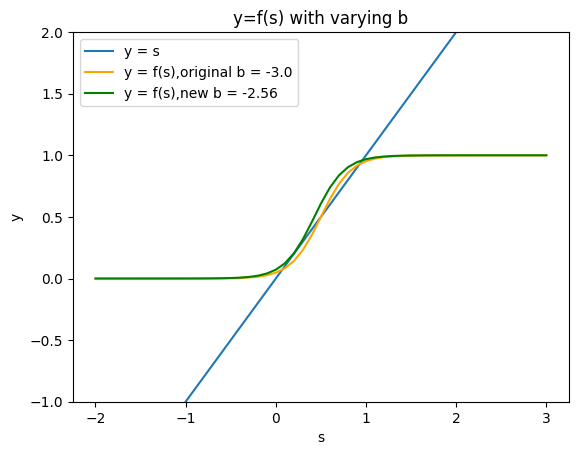

In [108]:
w = 6
s0 = 0

old_b = b0_value
new_b = b_bifurcation

plt.plot(s,s,label= f"y = s")
plt.plot(s,sigmoid(s,w,old_b),label= f"y = f(s),original b = {b0_value}",color = "orange")
plt.plot(s,sigmoid(s,w,new_b),label= f"y = f(s),new b = {new_b:.2f}",color = "green")

plt.legend()
plt.ylim(-1,2)
plt.title("y=f(s) with varying b")
plt.xlabel("s")
plt.ylabel("y")

The numerical verification shows that our analytical result was correct. Indeed, as shown in the green line, a point initialized in the lower basin stabalized at the upper basin after we changed $b$ from $-3.0$ to $-2.56$.

### 1.7 [ 5 points]  Linear Stability Analysis around  the fixed points
[5 points]

Perform a linear stability analysis around the fixed point $s_c=1/2$ with $b=-w/2$. Verify through linear stability analysis your conclusions from graphical stability analysis (on both sides of the bifurcation point, which you know from calculations done above).


a.) Use the following approximation

$$
\frac{1}{1 + e^{-x}} \approx  0.5 + \frac{1}{4} x - \frac{1}{48} x^3
$$

to study analytically the fixed points of the system for $b = -w/2$. Use linear stability analysis to determine the stability of the fixed points on both sides of the bifurcation point.



From 1.1, we have that $$\tau \frac{ds}{dt} = -s + \frac{1}{1+e^{-(ws+b)}}.$$

Plugging in $b = -\frac{w}{2}$, we want to evaluate $\frac{ds}{dt}$ at $s = Δs+\frac{1}{2}.$ Plugging $Δs+\frac{1}{2}$ into the equation and simplifying, we get


$$\tau \frac{ds}{dt}= -\frac{1}{2} - \Delta s + \frac{1}{1+e^{-\Delta s w}}$$

$$\approx -0.5 - \Delta s  + 0.5 + \frac{1}{4}\Delta s w - \frac{1}{48}(\Delta s w)^3.$$

The last term $\frac{1}{48}(\Delta s w)^3$ will be extremely small, so we can further simplify the equation into

$$\tau \frac{ds}{dt} \approx - \Delta s + \frac{1}{4}\Delta s w = (\frac{1}{4}w-1)\cdot \Delta s$$

When $w > 4$, $\frac{ds}{dt}$ takes positive values when $\Delta s > 0$ and negative values when $\Delta s < 0 \implies s = \frac{1}{2}$ is an unstable fixed point. When $w < 4$, $\frac{ds}{dt}$ takes positive values when $\Delta s < 0$ and negative values when $\Delta s > 0 \implies s = \frac{1}{2}$ is a stable fixed point.

## Problem 2: Linear neural integrator, leaky integration, low-pass filtering (30 points)

Consider a linear network with two mutually
inhibitory neurons, with synaptic dynamics given by

$$
\tau \frac{ds}{dt} = - s + W s + b \tag{2}
$$

where $s(t)$ is a 2-dimensional activity vector at time t, $\tau$ is a time constant, and (mutually inhibitory)
weights

$$
W= \begin{bmatrix}
0   & - w \\
-w   &  0
\tag{3}
\end{bmatrix}
$$
where $w > 0$.


### 2.1 [2 points] Eigenvalues

Derive the eigenvalues of the weight matrix W.



$$
\text{det}(W - \lambda I)= \text{det}\bigg(\begin{bmatrix}
-\lambda  & - w \\
-w   &  -\lambda
\end{bmatrix}\bigg) = \lambda^2 - w^2 = 0 \implies \lambda = \pm w.
$$


### 2.2 [5 points] Fixed points

What are the possible fixed points of the system, as a function of $w$ and $b$?


$$
\frac{ds}{dt} = 0 \implies - s + W s + b = 0 \implies (W - I)s + b = 0 \implies s = -(W - I)^{-1}b
$$

Note that $(W - I)^{-1} = -\frac{1}{1-w^2}(W+I)$. The matrix is only invertible when $w \neq 1$. Explanding $s = -(W - I)^{-1}b$, we get $$s_1 = \frac{b_1-wb_2}{1-w^2}$$ and $$s_2 = \frac{b_2-wb_1}{1-w^2} .$$

So $$s^* = \begin{bmatrix}s_1 \\s _2\end{bmatrix}=\begin{bmatrix}\frac{b_1-wb_2}{1-w^2} \\\frac{b_2-wb_1}{1-w^2}\end{bmatrix} = \frac{1}{(1+w)(1-w)}(b -w\begin{bmatrix}0 & 1\\ 1& 0\end{bmatrix}b)$$

When $w \neq 1$, there's only one fixed point, which is the one we just derived above.

When $w = 1,$ there may be infinite number of fixed points or no fixed point, depending on the value of $b$. When $b = \begin{bmatrix} 1 & 1 \\
1 & 1 \end{bmatrix}\begin{bmatrix} s_1 \\
s_2 \end{bmatrix}$ aka $b_1 = b_2$, then there will be infinitely many fixed points. If $b$ equals anything else, there will be no solution.

### 2.3 [3 points] Stability

What is the condition on $w$ for the system to be stable (Note: in the absence of b)?


In the absence of $b$, $\frac{ds}{dt} = - s + W s = f(s) \implies \frac{df(s)}{ds} = -I + W,$ which is the Jacobian matrix. For the system to be stable, all the eigenvalues of the Jacobian matrix must have negative real parts. We have that $\lambda_1 = -1 - w$ and $\lambda_2 = -1 + w$. So the system is stable when $w < 1.$

### 2.4 [5 points] Eigenvectors


Find the eigenvectors of $W$. Note that it is a symmetric
matrix, and thus the eigenvectors form an orthogonal basis set. Check that this is the case.



Let $v_1,\;v_2$ be the two eigenvalues. We have that $Wv_1 = \lambda_1v_1$ and $Wv_2 = \lambda_2v_2.$

Solving for $\lambda_1 = w$ and $\lambda_2 = -w,$ we have the eigenvectors of $W$ are $v_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$ and $v_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$. They form an orhogonal basis set because $v_1 \cdot v_2 = 1 - 1 = 0.$

### 2.5 [5 points] Change of basis

Using the set of eigenvectors as a new basis set, rewrite the dynamics equation, Eq.(2), in this new basis $B = \{ v_w, v_{-w} \}$.

Note: In the new basis, the dynamics becomes decoupled and the new components of the vector $s$ are called the eigenmodes of the system.

$$
\tau v_w^T\frac{ds}{dt} = - v_w^Ts + v_w^TW s + v_w^Tb
\implies \tau \frac{du_w}{dt} = -u_w + wu_w + b_1 - b_2$$ where $u_w = v_w^Ts = s_1 - s_2.$

$$\tau v_{-w}^T\frac{ds}{dt} = -v_{-w}^Ts + v_{-w}^TWs + v_{-w}^Tb \implies \tau \frac{du_{-w}}{dt} = -u_{-w} -wu_{-w} + b_1 + b_2$$ where $u_{-w} = s_1 + s_2.$

### 2.6 [5 points] Time constants

When $W$ is tuned so the system exhibits a continuum of fixed points, what is the time-constant for dynamics along that direction? What
is the time-constant for dynamics along the orthogonal direction?



The time constant for the dynamics along the continuum of fixed points is $\tau_w = \frac{\tau}{1-\lambda_1} = \frac{\tau}{1-w}.$ The time constant for dynamics along the orthogonal direction is $\tau_{-w} = \frac{\tau}{1-\lambda_2} = \frac{\tau}{1+w}.$

### 2.7 [5 points] Simulation

Numerically simulate this system, using $w = 1, s_0 = 0, dt = 0.2 \,ms, \tau =
50 \, ms$, and total time $T = 1000 \, ms$.

<br>


Run this simulation three times, each with
four <font color='red'>brief input pulses of 50ms long </font> at $200, 400, 600, 800 \, ms$.






*   simulation 1: make
the 4 pulses parallel to the integrating mode, with magnitudes <font color='red'>$2/250, -1/250, -1/250, 1/250$</font>, respectively.
*   simulation 2: repeat simulation 1 with pulse orthogonal to the integrating mode
*   simulation 3: sample four pulses with random directions

<br>

For each of these simulations:

1.   plot synaptic activation as a function of time
2.   plot firing rates as a function of time


 You should see that the system is an integrator for differential inputs, and
that components of the input (perturbations) perpendicular to the integrating
mode quickly decay away. The system is robust/resistant to noise perpendicular
to the integrator.

<font color='red'>The following codes are also updated.</font>

In [109]:
import numpy as np
import matplotlib.pyplot as plt


w = 1
s0 = np.zeros((2,1))  # initial state col.vector
dt = 0.2   # ms
tau = 50   # ms
T = 1000   # ms

W = np.array([[0,-w],[-w,0]])  # weight matrix

N = int(T/dt)    # number of steps

# pulse inputs
v1 = np.array([[1],[1]])/np.sqrt(2)
v2 = np.array([[1],[-1]])/np.sqrt(2)

v_rand = np.random.randn(2,1)
v_rand = v_rand/np.linalg.norm(v_rand)

time = dt*np.arange(0,N)
b_mag = np.zeros(N)
#b_mag[(time<200) | ((time < 600) & (time > 400)) |(time>800)] = 1
b_mag[int(200/dt):int(249/dt)] = 2/250
b_mag[int(400/dt):int(449/dt)] = -1/250
b_mag[int(600/dt):int(649/dt)] = -1/250
b_mag[int(800/dt):int(849/dt)] = 1/250

b_intg = v2*b_mag
b_perp = v1*b_mag
b_rand = v_rand*b_mag

In [110]:
def solve_s(s, b, tau, T, dt):
    s1,s2= s
    u1 = s1 - s2
    u2 = s1 + s2
    u1s = []
    u2s = []
    def du1dt(u,b,tau):
      b1,b2 = b
      rhs = -u + w*u +b1 - b2
      return rhs/tau
    def du2dt(u,b,tau):
      b1,b2 = b
      rhs = -u -w*u+b1+b2
      return rhs/tau
    for i in range(int(T/dt)):
        u1 = u1 + du1dt(u1,b[:,i],tau)*dt
        u2 = u2 + du2dt(u2,b[:,i],tau)*dt
        u1s.append(u1)
        u2s.append(u2)
    return (np.asarray(u1s) @ v1.T + np.asarray(u2s)@ v2.T).T

def firing_rate(s, b):
    g = s + b
    f =1/(1 + np.exp(-g))
    return f


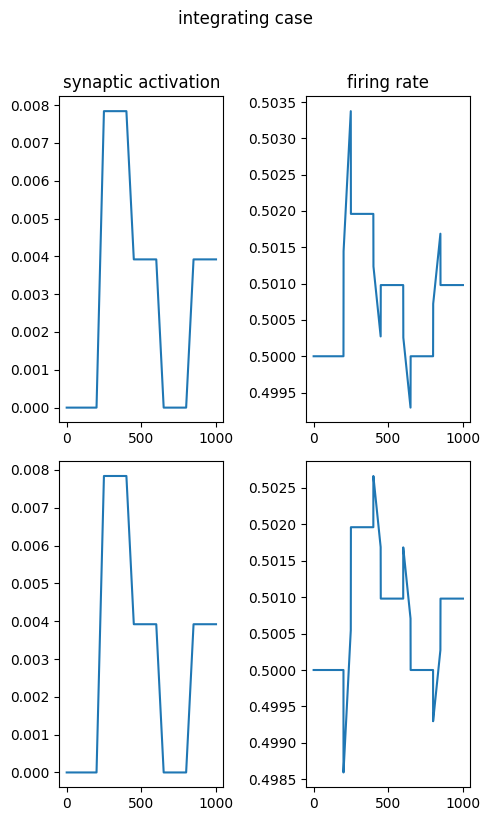

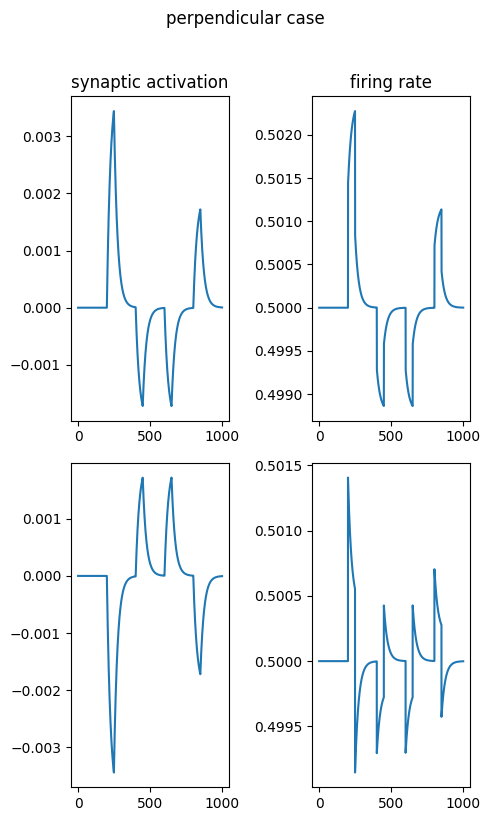

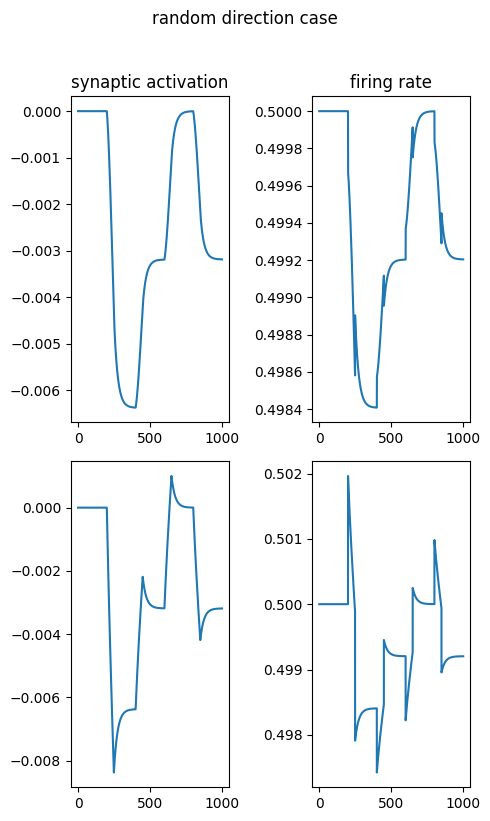

In [111]:
title_str =['integrating case','perpendicular case', 'random direction case']
for sim in range(3):
    if  sim ==0:
        b = b_intg
    elif sim ==1:
        b = b_perp
    else:
        b = b_rand

    s = solve_s(s0, b, tau, T, dt)
    f = firing_rate(s, b)

    fig, ax = plt.subplots(2,2, figsize=(5,8))
    ax[0,0].plot(time,s[0,:])
    ax[0,1].plot(time,f[0,:])
    ax[0,0].set_title('synaptic activation')
    ax[0,1].set_title('firing rate')

    ax[1,0].plot(time,s[1,:])
    ax[1,1].plot(time,f[1,:])

    plt.suptitle(title_str[sim], y=1.02)
    plt.tight_layout()



## Problem 3: Switching Dynamics During Perceptual Bistability (20 points)


Consider this image of a cube, called a "Necker Cube":

https://en.wikipedia.org/wiki/Necker_cube#/media/File:Necker_cube.svg

Enlarge the image so it takes up a sizeable portion of your screen, and stare at the bottom leftmost corner of the
cube for 30 seconds. It should look like the cube switches orientation periodically.


This phenomenon is an example of what's called "perceptual bistability", the perception of a static stimulus switching between two modes. Many stimuli elicit perceptual
bistability, including in non-visual domains!


In this problem, you will explore switching dynamics during perceptual bistability,
using a 2-neuron model. Consider a pair of neurons in a circuit with synaptic dynamics given by:

$$
\tau \frac{d s}{d t} = -s + f(W s - g a + b(1 +n))
$$


where $W$ is a $2\times 2$ matrix of synaptic weights, $s$ is the time-varying synaptic activation
variable, $\tau$ is the synaptic time-constant, and $b$ is the strength of the feedforward input.
Let the $f-I$ (transfer) function be the sigmoid $f(x) = e^x/(1 + e^x)$.
The $2\times 1$ variable $a$, used to model neural adaptation, is a running average of recent
activity in each neuron:

$$
\tau_a \frac{d a}{d t} = - a(t) + r
$$

where $r = f(W s - g a + b(1 +n))$ is the $2\times 1$ vector of firing rates of the neurons
and $\tau_a  >> \tau$ is a slow adaptation time-constant (i.e., slower than $\tau$ ). This adaptation
variable feeds back into the synaptic dynamics equation in the form of a negative
feedback: The more a neuron fires, the more adapted it becomes ($a_i$ increases), and
the greater the negative drive to the neuron. The strength of adaptation is controlled
by the parameter $g$.
The term $n(t)$ reflects internal circuit noise, with independent components $n_1, n_2$,
which we will assume are simply linearly low-pass filtered versions of random Gaussian
noise:

$$
\tau_n \frac{d n}{d t} = - n(t) + \sigma \sqrt{\frac{2}{\tau_n}} \mathcal{N} (0,1)
$$


where $\tau_n << \tau$ and $\mathcal{N}(0,1)$ is a $2\times 1$ vector
of independent zero-mean Gaussian
random variables with unit variance. Let the two neurons symmetrically inhibit each
other, so that

$$
W = \begin{bmatrix}
0 & - w \\
-w & 0
\end{bmatrix}.
$$


We will use these dynamics to model the psychophysical phenomenon of perceptual
bistability, to investigate potential mechanisms of perceptual switching.





### 3.1 [5 points] Simulation without noise

[numerical]


Implement a simulation of this model.
Use parameters $w = 5, b = 2, g = 1$, and time constants $\tau = 50 \,ms$, $\tau_n = 10 \, ms$, $\tau_a = 500 \, ms$. Set the perceptual noise to zero, i.e. $\sigma = 0$. Simulate the
model's dynamics for $10$ seconds (10,000ms) with $dt = 0.2ms$ and initial values
$s(0) = [0.4, 0.5]$, $a(0) = n(0) = [0, 0]$. Make a plot of the two neurons' synaptic
activations $s$ over time.




In [112]:
def f(x):
  return np.exp(x)/(1 + np.exp(x))

In [113]:
w = 5
b = 2
g = 1
tau = 50          # ms
tau_n = 10        # ms
tau_a = 500       # ms
sigma = 0

W = np.array([[0, -w], [-w, 0]])

Time = 10000    # ms
dt = 0.2   # ms
N = int(Time/dt)
s = np.array([0.4, 0.5])
a = np.array([0.0, 0.0])
n = np.array([0.0, 0.0])

In [114]:
def simulate_necker(b, g, sigma, s, a, n, dt, T, tau_a):
    a_values = np.zeros((N, 2))
    s_values = np.zeros((N, 2))
    s_values[0] = s
    a_values[0] = a

    for i in range(1, N):
        noise = np.random.normal(loc=0.0, scale=1.0, size=(2))
        r = f(np.dot(W, s) - g * a + b * (1 + n))
        dsdt = (-s + r) / tau
        s = s + dsdt * dt
        dadt = (-a + r) / tau_a
        a = a + dadt * dt
        dn_dt = (-n + sigma * np.sqrt(2 / tau_n) * noise) / tau_n
        n = n + dn_dt * dt
        s_values[i] = s
        a_values[i] = a

    return s_values, a_values, n

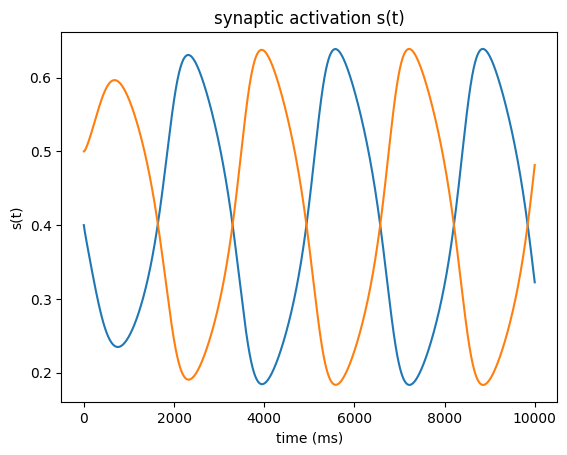

In [115]:
# plot system dynamics

s_values, a_values, n_values = simulate_necker(b, g, sigma, s, a ,n,dt,Time, tau_a)
t_intv = np.arange(0, Time, dt)
fig, ax = plt.subplots()
ax.plot(t_intv, s_values.T[0]);
ax.plot(t_intv, s_values.T[1]);
ax.set_xlabel('time (ms)')
ax.set_ylabel('s(t)')
ax.set_title('synaptic activation s(t)');


### 3.2 [5 points] Effects of Adaptation

[numerical]

#### a.)   Vary the adaptation strength $g$ from $0.5$
to $2$ in increments of $0.3$. For each such value of $g$, simulate the network for $10$
seconds (still with $\sigma = 0$) and compute the switch rate in Hz. Plot the switch
rate as a function of $g$. Briefly, in 1 or 2 sentences justify why you expect this effect given the equations of the system.



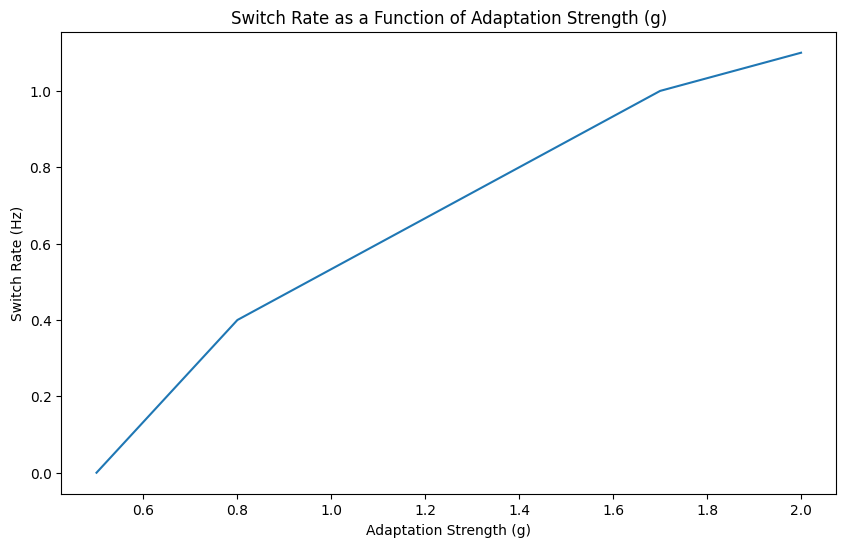

In [116]:
# vary g
G = np.arange(0.5,2.1,0.3)

Time = 10000    # 10 seconds
N = int(Time/dt)
t_intv = np.arange(0, Time, dt)
FREQ = []


def freq_switch(x, dt, T):
    s1 = x[:, 0]
    s2 = x[:, 1]
    switches = 0

    # Detect switches: count when neuron dominance switches
    for i in range(1, len(s1)):
        if (s1[i-1] > s2[i-1] and s1[i] < s2[i]) or (s1[i-1] < s2[i-1] and s1[i] > s2[i]):
            switches += 1

    # Calculate frequency in Hz
    freq = switches / (T / 1000)  # Number of switches per second
    return freq

G = np.arange(0.5, 2.1, 0.3)
FREQ = []

for g_value in G:
    # Simulate the system with the current g_value
    s_values, _, _ = simulate_necker(b, g_value, sigma, s, a, n, dt, Time, tau_a)

    # Calculate the switch frequency
    switch_frequency = freq_switch(s_values, dt, Time)
    FREQ.append(switch_frequency)

# Plot the switch rate as a function of g
plt.figure(figsize=(10, 6))
plt.plot(G, FREQ)
plt.xlabel('Adaptation Strength (g)')
plt.ylabel('Switch Rate (Hz)')
plt.title('Switch Rate as a Function of Adaptation Strength (g)')
plt.show()

Increasing the adaptation strength
$g$ should increase the switch rate because stronger adaptation causes neurons to suppress their own activity more rapidly after firing. This makes it easier for the system to switch between dominance states, thus increasing the rate of perceptual switches.

#### b.)   Now, fix $g = 1$ and vary the timescale of adaptation $\tau_a$ from $500 ms$ to $2500 ms$ in
increments of $500 ms$. Plot the switch rate as a function of $\tau_a$. Briefly, in 1 or 2
sentences justify why you expect this effect given the equations of the system.


In [120]:
# g = 1, vary tau_a
Tau_a = np.arange(500,2501,500)
g = 1
FREQ=[]

for tau_a in np.arange(500,2501,500):
    # Simulate the system with the current g_value
    s_values, _, _ = simulate_necker(b, g, sigma, s, a, n, dt, Time, tau_a)

    # Calculate the switch frequency
    switch_frequency = freq_switch(s_values, dt, Time)
    FREQ.append(switch_frequency)


Text(0.5, 1.0, 'Switching rate')

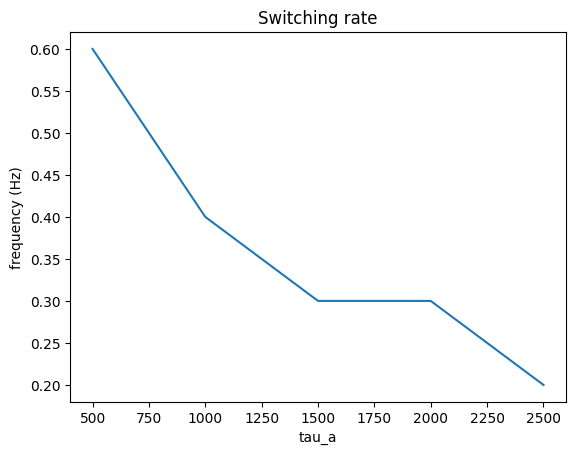

In [121]:
fig, ax =plt.subplots()
ax.plot(np.arange(500,2501,500), FREQ)
ax.set_xlabel('tau_a')
ax.set_ylabel('frequency (Hz)')
ax.set_title('Switching rate')

As $\tau_a$ increases, the switch rate decreases. This occurs because a longer adaptation timescale means that the adaptation variable $a$ changes more slowly, resulting in less frequent changes in dominance between the two neurons. Consequently, the system takes longer to switch states, leading to a lower switch rate


### 3.3 [5 points] Adding Noise

[numerical]


Add noise by setting $\sigma = 2$, simulate for $100 seconds$,
and plot a histogram of the inter-switch intervals (ISIs) in that simulation. When
computing the ISIs, please ignore ISIs less than $200ms$ (these very short ISIs are
caused by high-frequency noise and should be filtered out for fitting perceptual
data).


In [ ]:
w = 5
b = 2
g = 1
tau = 50          # ms
tau_n = 10        # ms
tau_a = 500       # ms
sigma = 2    # noise
Time = 100000
N = int(Time/dt)
t_intv = np.arange(0, Time, dt)

def ISI(x, dt, T):
    s1 = x[:, 0]
    s2 = x[:, 1]
    switches = []

    last_switch_time = 0
    for i in range(1, len(s1)):
        if (s1[i-1] > s2[i-1] and s1[i] < s2[i]) or (s1[i-1] < s2[i-1] and s1[i] > s2[i]):
            current_time = i * dt
            isi = current_time - last_switch_time
            if isi >= 200:
                switches.append(isi)
                last_switch_time = current_time

    return switches


s_values, _, _ = simulate_necker(b, g, sigma, s, a, n, dt, Time, tau_a)

# Calculate ISIs
isi_values = ISI(s_values, dt, Time)

Text(0.5, 1.0, 'Inter-switch interval distribution')

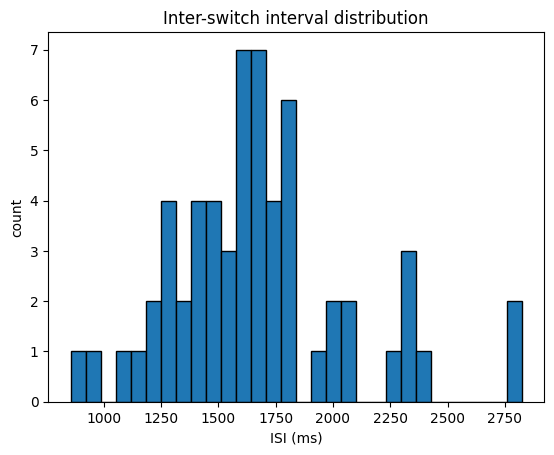

In [ ]:
fig, ax =plt.subplots()
ax.hist(isi_values, bins=30, edgecolor='black')
ax.set_xlabel('ISI (ms)')
ax.set_ylabel('count')
ax.set_title('Inter-switch interval distribution')


### 3.4 [5 points] Fitting Real Data

[numerical/graphical]

Load the provided necker cube ISI dataset:

Download the
file **necker_cube_isi_data.npy** from
the assignment page on canvas.

Upload this data into your Colab session by clicking on the File symbol on the left-side toolbar, then the upload symbol. Now you can load the data by running
$$
\text{np.load('necker_cube_isi_data.npy') }
$$
in a code cell.


The dataset you loaded is a vector of self-reported inter-switch intervals from a human subject looking at the Necker cube stimulus, in units of ms.


Plot a histogram of the inter-switch intervals from this dataset. Comment on how it compares to your model.



In comparison to our model, the self-reported ISI is more skewed to the right, with a long tail of large ISI values. This is possibly due to anormal distribution of adaptation / $\tau_a$ among participants (certain participants have low adaptation/high $\tau_a$).



In [ ]:
dat = np.load('sample_data/PS2_necker_cube_isi_data.npy')

Text(0.5, 1.0, 'Inter-switch interval distribution')

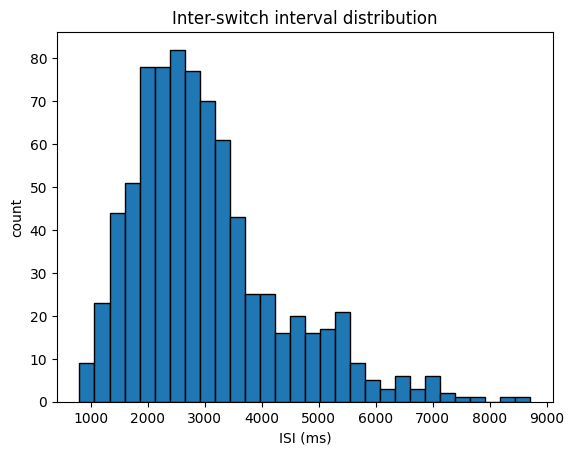

In [ ]:
fig, ax =plt.subplots()
ax.hist(dat, bins=30, edgecolor='black')
ax.set_xlabel('ISI (ms)')
ax.set_ylabel('count')
ax.set_title('Inter-switch interval distribution')